# <span style='font-family:Garamond'><span style='color:#B21807'> <h4 align="center"> Préparation, nettoyage et analyse exploratoire des données.</h4> </span>

***

# <span style='font-family:Garamond'><span style='color:#B21807'>Table des matières : </span>


* [Introduction](#chapter0)
    * [0.1 Contexte](#section_0_1)
    * [0.2 import des librairies et tables necessaires](#section_0_2)
* [1 Nettoyage manipulation des tables](#chapter1)
    * [1.1 Traitement table dispo alimentaire](#section_1_1)
    * [1.2 Traitement table Année](#section_1_2)
    * [1.3 Traitement table P.I.B](#section_1_3)
    * [1.4 Jointures](#section_1_4)
    * [1.5 Néttoyage et modifications finals](#section_1_5)
* [2 Analyse exploratoire des données](#chapter2)
    * [2.1 Analyse univariée](#section_2_1)
    * [2.2 Analyse bivariée](#section_2_2)
* [3 Analyse en composante principale](#chapter3)    
* [4 Conclusion](#chapter4) 

# <span style='font-family:Garamond'><span style='color:#B21807'>Introduction</span> <a class="anchor" id="chapter0"></a>

## <span style='font-family:Garamond'><span style='color:#046307'>0.1 Contexte</span> <a class="anchor" id="section_0_1"></a>

<img src="logo_la_poule_qui_chante.png" width="250" height="250">

<div style='font-family:Garamond'><div style='font-size: 20px'>
    
    
    
Je suis **Data Analyst chez La Poule qui Chante**, une entreprise française d’agroalimentaire.

L'entreprise souhaite se développer à l'international : aucun pays particulier ni aucun continent n'a été choisi pour le moment. Tous les pays sont envisageables.

Je suis missionné pour effectuer une étude de marché préliminaire afin de proposer une première analyse des groupements de pays que l'on peut cibler pour exporter les poulets (l'analyse sera ensuite approfondie).

Deux tableaux sont mis à ma disposition, provenant de la F.A.O :

Une table proposant un bilan alimentaire par pays pour l'année 2017 : DisponibiliteAlimentaire_2017.csv.
Une table informant sur la population par pays entre 2000 et 2017 : Population_2000_2018.csv.
Je suis libre de rajouter des données extérieures qui me semblent pertinentes.

Mes missions vont être les suivantes :

- Rendre un premier notebook contenant la préparation, le nettoyage et l'analyse exploratoire des données.
    
- Rendre un second notebook contenant le(s) clustering(s) effectué(s), et les différentes visualisations associées avec les groupes de pays retenus pour l'exportation.
    
Ce premier notebook se concentre donc sur la préparation, le nettoyage et l'analyse exploratoire des données précédant les techniques de clustering.

## <span style='font-family:Garamond'><span style='color:#046307'>0.2 importation des librairies et tables necessaires</span> <a class="anchor" id="section_0_2"></a>

In [1]:
#Import des librairies necessaires

import pandas as pd
import numpy as np

from IPython.display import display, HTML
from IPython.display import Image
from IPython.display import Markdown, display

from collections import defaultdict

import random
import re

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as shc
import scipy.stats as stats

import matplotlib.pyplot as plt 
import seaborn as sns


# import des tables
dispo_alimentaire_2017 = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
population_2000_2018 = pd.read_csv("Population_2000_2018.csv")
PIB_total_et_par_habitan_par_pays = pd.read_excel('PIB 2017 total et par habitant par pays.xls')
Stabilité_politique_2017 = pd.read_excel('Stabilité politique.xls')

#Configuration d'une auto sauvegarde toute les 60sec.
%autosave 60

Autosaving every 60 seconds


***

#  <span style='font-family:Garamond'><span style='color:#B21807'>1. Nettoyage et manipulation des tables </span> <a class="anchor" id="chapter1"></a>

## <span style='font-family:Garamond'>Traitement table dispo alimentaire</span> <a class="anchor" id="section_1_1"></a>

In [2]:
dispo_alimentaire_2017.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


<div style='font-family:Garamond'><div style='font-size: 20px'>
La table nous donne différentes informations sur chaque produit alimentaire par pays, telles que sa disponibilité, sa quantité exportée, importée, etc. Nous allons nous concentrer sur la viande de volaille et supprimer les colonnes inutiles.

Nous allons nous concentrer sur la colonne "éléments" qui contient tous les indicateurs qui nous intéressent, et nous allons la faire pivoter.

In [3]:
# Se concentrer seulement sur les infos sur la catégorie 'Viande de Volailles'
dispo_alimentaire_2017 = dispo_alimentaire_2017.loc[dispo_alimentaire_2017['Produit'] == 'Viande de Volailles']

# supression des colonnes inutiles table dispo alimentaire
dispo_alimentaire_2017.drop(['Code Domaine','Produit', 'Domaine','Année','Code zone', 'Code Élément','Code Produit', 'Code année','Symbole','Description du Symbole'], axis=1, inplace=True)

#concaténéer les colonnes unité et valeurs
dispo_alimentaire_2017['Quantité + unité'] = dispo_alimentaire_2017.apply(lambda row: str(row['Valeur']) + str(row['Unité']), axis=1)
dispo_alimentaire_2017 = dispo_alimentaire_2017.drop(['Valeur', 'Unité'], axis=1)

# création d'un df special volaille
dispo_alimentaire_2017_volaille = dispo_alimentaire_2017

# Pivoter la colonne élément
dispo_alimentaire_2017_volaille = dispo_alimentaire_2017_volaille.pivot(index='Zone', columns='Élément', values='Quantité + unité')

# supression des colonnes inutiles dans la nouvelle table (pas de valeurs)
dispo_alimentaire_2017_volaille.drop(['Résidus','Variation de stock', 'Aliments pour animaux','Traitement','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)','Alimentation pour touristes','Autres utilisations (non alimentaire)','Semences','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)'], axis=1, inplace=True)

In [4]:
dispo_alimentaire_2017_volaille.head(10)

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production
Zone,,,,,,
Afghanistan,57.0Milliers de tonnes,NaN,29.0Milliers de tonnes,55.0Milliers de tonnes,2.0Milliers de tonnes,28.0Milliers de tonnes
Afrique du Sud,2118.0Milliers de tonnes,63.0Milliers de tonnes,514.0Milliers de tonnes,2035.0Milliers de tonnes,83.0Milliers de tonnes,1667.0Milliers de tonnes
Albanie,47.0Milliers de tonnes,0.0Milliers de tonnes,38.0Milliers de tonnes,47.0Milliers de tonnes,NaN,13.0Milliers de tonnes
Algérie,277.0Milliers de tonnes,0.0Milliers de tonnes,2.0Milliers de tonnes,264.0Milliers de tonnes,13.0Milliers de tonnes,275.0Milliers de tonnes
Allemagne,1739.0Milliers de tonnes,646.0Milliers de tonnes,842.0Milliers de tonnes,1609.0Milliers de tonnes,NaN,1514.0Milliers de tonnes
Angola,319.0Milliers de tonnes,0.0Milliers de tonnes,277.0Milliers de tonnes,315.0Milliers de tonnes,2.0Milliers de tonnes,42.0Milliers de tonnes
Antigua-et-Barbuda,7.0Milliers de tonnes,0.0Milliers de tonnes,7.0Milliers de tonnes,5.0Milliers de tonnes,NaN,0.0Milliers de tonnes
Arabie saoudite,1435.0Milliers de tonnes,10.0Milliers de tonnes,722.0Milliers de tonnes,1435.0Milliers de tonnes,NaN,616.0Milliers de tonnes
Argentine,1962.0Milliers de tonnes,207.0Milliers de tonnes,8.0Milliers de tonnes,1856.0Milliers de tonnes,106.0Milliers de tonnes,2161.0Milliers de tonnes


<div style='font-family:Garamond'><div style='font-size: 20px'>
Pour l'instant, je vois que ma table n'est pas complète et nécessite encore un certain nettoyage. Je préfère faire le minimum maintenant et une fois que toutes mes tables seront jointes, procéder à un gros nettoyage.

On peut également noter le fait que les unités se trouvent dans les valeurs et non en titre de colonne, ce qui va nous empêcher de convertir nos variables en format float.

## <span style='font-family:Garamond'>Traitement table Année</span> <a class="anchor" id="section_1_2"></a>

In [5]:
population_2000_2018.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [6]:
# Mettre les valeurs de population à la bonne echelle
population_2000_2018['Valeur'] = population_2000_2018['Valeur'] * 1000

# Ne garder que l'année 2017
population_2017 = population_2000_2018.loc[population_2000_2018['Année'] == 2017]

# Supression des colonnes inutiles table population
population_2017.drop(['Code Domaine','Unité','Année','Élément','Produit', 'Domaine','Code zone', 'Code Élément','Code Produit', 'Code année','Symbole','Description du Symbole','Note'], axis=1, inplace=True)

# Renommer colonne population
population_2017 = population_2017.rename(columns={'Valeur': 'Effectif population'})

# Retirer decimals population
population_2017['Effectif population'] = population_2017['Effectif population'].astype(int)

C:\Users\DATA\AppData\Local\Temp\ipykernel_19880\397623553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2017.drop(['Code Domaine','Unité','Année','Élément','Produit', 'Domaine','Code zone', 'Code Élément','Code Produit', 'Code année','Symbole','Description du Symbole','Note'], axis=1, inplace=True)


In [7]:
population_2017.head(5)

,Zone,Effectif population
17,Afghanistan,36296113
36,Afrique du Sud,57009756
55,Albanie,2884169
74,Algérie,41389189
93,Allemagne,82658409


## <span style='font-family:Garamond'>Traitement table P.I.B</span> <a class="anchor" id="section_1_3"></a>

In [8]:
PIB_total_et_par_habitan_par_pays.head(5)

,Zone,Élément,Unité,Valeur
0,Afghanistan,Valeur US $,millions,18896.352021
1,Afghanistan,Valeur US $ par habitant,US$,520.616409
2,Afrique du Sud,Valeur US $,millions,349006.689642
3,Afrique du Sud,Valeur US $ par habitant,US$,6121.876572
4,Albanie,Valeur US $,millions,13019.729856


In [9]:
#Suprimmer pib par habitant
PIB_total_et_par_habitan_par_pays = PIB_total_et_par_habitan_par_pays[~PIB_total_et_par_habitan_par_pays["Élément"].str.contains("Valeur US \$ par habitant")]

# Réinitialiser l'affichage des nombres à virgule flottante
pd.options.display.float_format = '{:.2f}'.format

# Mettre les valeurs en million, préciser la monnaie d'evaluation en nom de colonne et se débarasser de la colonne élément et unité.
PIB_total_et_par_habitan_par_pays = PIB_total_et_par_habitan_par_pays.drop(["Élément", "Unité"], axis=1)
PIB_total_et_par_habitan_par_pays['Valeur'] = PIB_total_et_par_habitan_par_pays['Valeur'] * 1000000
PIB_total_et_par_habitan_par_pays = PIB_total_et_par_habitan_par_pays.rename(columns={'Valeur': 'P.I.B global ( Valeur en dollars américains en termes nominaux)'})

In [10]:
PIB_total_et_par_habitan_par_pays.head(5)

,Zone,P.I.B global ( Valeur en dollars américains en termes nominaux)
0,Afghanistan,18896352021.00
2,Afrique du Sud,349006689642.00
4,Albanie,13019729856.00
6,Algérie,170096984537.00
8,Allemagne,3690849152518.00


## <span style='font-family:Garamond'>Jointures</span> <a class="anchor" id="section_1_4"></a>

In [11]:
# jointure entre les tables dispo alimentaire et population.
Etude_volaille_par_pays_2017 = dispo_alimentaire_2017_volaille.merge(population_2017, on='Zone', how='left')

# Jointure entre la table PIB et la table sur mon analyse de la volaille 2017
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.merge(PIB_total_et_par_habitan_par_pays, on='Zone', how='left')

#Jointure table stabilité politique avec le reste jointure gauche
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.merge(Stabilité_politique_2017, on='Zone', how='left')

Etude_volaille_par_pays_2017.head(5)

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Effectif population,P.I.B global ( Valeur en dollars américains en termes nominaux),Score stabilité politique
0,Afghanistan,57.0Milliers de tonnes,NaN,29.0Milliers de tonnes,55.0Milliers de tonnes,2.0Milliers de tonnes,28.0Milliers de tonnes,36296113,18896352021.00,-2.80
1,Afrique du Sud,2118.0Milliers de tonnes,63.0Milliers de tonnes,514.0Milliers de tonnes,2035.0Milliers de tonnes,83.0Milliers de tonnes,1667.0Milliers de tonnes,57009756,349006689642.00,-0.28
2,Albanie,47.0Milliers de tonnes,0.0Milliers de tonnes,38.0Milliers de tonnes,47.0Milliers de tonnes,NaN,13.0Milliers de tonnes,2884169,13019729856.00,0.38
3,Algérie,277.0Milliers de tonnes,0.0Milliers de tonnes,2.0Milliers de tonnes,264.0Milliers de tonnes,13.0Milliers de tonnes,275.0Milliers de tonnes,41389189,170096984537.00,-0.92
4,Allemagne,1739.0Milliers de tonnes,646.0Milliers de tonnes,842.0Milliers de tonnes,1609.0Milliers de tonnes,NaN,1514.0Milliers de tonnes,82658409,3690849152518.00,0.59


## <span style='font-family:Garamond'>Néttoyage et modifications finals</span> <a class="anchor" id="section_1_5"></a>

In [12]:
# Enlever les unités des colonnes exportations et importations 
Etude_volaille_par_pays_2017['Exportations - Quantité'] = Etude_volaille_par_pays_2017['Exportations - Quantité'].str.replace(r'[^\d.,]', '').astype(float)
Etude_volaille_par_pays_2017['Importations - Quantité'] = Etude_volaille_par_pays_2017['Importations - Quantité'].str.replace(r'[^\d.,]', '').astype(float)

# préciser l'unité dans le titre de la colonne pour les exportations et importations 
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.rename(columns={'Exportations - Quantité': 'Exportations ( en milliers de tonnes)', 'Importations - Quantité': 'Importations ( en milliers de tonnes)', 'Balance commercial (en millier de tonnes)': 'Balance commercial ( en millier de tonnes)'})

# Renommer colonne pour rajouter l'unité millier de tonne et conserver seulement les valeurs numérique dans les variables
for col in Etude_volaille_par_pays_2017.columns:
    if Etude_volaille_par_pays_2017[col].dtype == 'object':
        if Etude_volaille_par_pays_2017[col].str.contains('Milliers de tonnes').any():
            Etude_volaille_par_pays_2017[col] = pd.to_numeric(Etude_volaille_par_pays_2017[col].str.replace('Milliers de tonnes', ''))
            Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.rename(columns={col: col + ' ( en milliers de tonnes)'})
    
# supression de l'ouzbekistan et République démocratique populaire laos car pas de données.
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.dropna(subset=["Disponibilité intérieure ( en milliers de tonnes)"])

# Supression de la chine car pas de stabilité politique et elle semble avoir des valeurs non interessantes pour nous.
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017[Etude_volaille_par_pays_2017["Zone"].str.contains("Chine, continentale")==False]

# application du score de stabilité politique francais à la nouvelel Caledonie et la polynesie francaise
mask = (Etude_volaille_par_pays_2017['Zone'] == 'Nouvelle-Calédonie') | (Etude_volaille_par_pays_2017['Zone'] == 'Polynésie française')
selected_rows = Etude_volaille_par_pays_2017.loc[mask]
Etude_volaille_par_pays_2017.loc[mask, 'Score stabilité politique'] = 0.28

# Remplacer les NAN des pertes en 0 ( peu de difference entre nourriture et dispo interieur donc peu de perte dans tout les cas)
Etude_volaille_par_pays_2017["Pertes ( en milliers de tonnes)"].fillna(0, inplace=True)

# Remplacer les NAN des exportation en 0. 
Etude_volaille_par_pays_2017["Exportations ( en milliers de tonnes)"].fillna(0, inplace=True)

# Ajout du pib de taiwan (manquant initialement)
Etude_volaille_par_pays_2017["P.I.B global ( Valeur en dollars américains en termes nominaux)"].fillna(1155000000000, inplace=True)

# remplacer production nan par 0 car dispo est = aux importations et 0 en export donc dispo = importantion.
Etude_volaille_par_pays_2017["Production ( en milliers de tonnes)"].fillna(0, inplace=True)

# MAj colonne balance commerciale
Etude_volaille_par_pays_2017['Balance commercial ( en millier de tonnes)'] = Etude_volaille_par_pays_2017['Exportations ( en milliers de tonnes)'] - Etude_volaille_par_pays_2017['Importations ( en milliers de tonnes)']

# Création d'une colonne pib par habitant
Etude_volaille_par_pays_2017['P.I.B par habitants ( Valeur en dollars américains en termes nominaux)'] = Etude_volaille_par_pays_2017['P.I.B global ( Valeur en dollars américains en termes nominaux)']/Etude_volaille_par_pays_2017['Effectif population']

# définir la colonne pays comme index
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.set_index('Zone')

# conversion de toute les colonnes en float
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.astype(float)

C:\Users\DATA\AppData\Local\Temp\ipykernel_19880\1972776178.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Etude_volaille_par_pays_2017['Exportations - Quantité'] = Etude_volaille_par_pays_2017['Exportations - Quantité'].str.replace(r'[^\d.,]', '').astype(float)
C:\Users\DATA\AppData\Local\Temp\ipykernel_19880\1972776178.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Etude_volaille_par_pays_2017['Importations - Quantité'] = Etude_volaille_par_pays_2017['Importations - Quantité'].str.replace(r'[^\d.,]', '').astype(float)


***

#  <span style='font-family:Garamond'><span style='color:#B21807'>2. Analyse exploratoire des données</span> <a class="anchor" id="chapter2"></a>

<div style='font-family:Garamond'><div style='font-size: 20px'>
Avant de commencer l'analyse, il est nécessaire de décrire un peu chaque indicateur et en quoi ils peuvent nous aider pour notre analyse.
    
    
    
- **Disponibilité intérieure (en milliers de tonnes)** : Nous indique la quantité de produit disponible dans le pays. Plus un pays a une forte disponibilité, plus il risque déjà d'être autonome et ne pas avoir besoin de viande supplémentaire.

- **Exportations / Importations (en milliers de tonnes)** : La quantité de viande que le pays exporte/importe. Plus un pays exporte, moins il est susceptible d'avoir besoin de poulet et inversement.

- **Nourriture (en milliers de tonnes)** : Quantité de viande de volaille utilisée pour nourrir la population. Plus cette quantité est élevée, plus le pays risque d'être déjà autonome en viande de volaille.

- **Pertes (en milliers de tonnes)** : Quantité de la disponibilité intérieure perdue due à diverses raisons (stockage, déplacement, conservation, etc.). Plus un pays a des pertes importantes, plus il risque d'avoir besoin de viande pour combler ces pertes. En revanche, il est aussi nécessaire de prendre en compte que cela peut être un frein. En effet, si il est difficile de conserver la viande importée dans le pays sans en perdre une quantité importante, cela ne sera pas intéressant de s'y implanter.

- **Production (en milliers de tonnes)** : Quantité produite dans le pays. Moins cette quantité est élevée, plus le pays risque d'avoir besoin d'importer de la viande de volaille.

- **Effectif de la population** : Plus la population est importante, plus le pays peut avoir besoin d'une quantité de viande de volaille.

- **P.I.B global (Valeur en dollars** américains en termes nominaux) et par habitant : Plus le pays a un PIB important, plus la population sera en mesure d'acheter nos produits.

- **Score de stabilité politique** : Plus un pays est stable, plus il sera facile de s'y implanter.

- **Balance commerciale (en milliers de tonnes)** : Plus une balance commerciale est déficitaire, plus le pays importe et donc risque d'être en demande de viande de volaille.

## <span style='font-family:Garamond'>1. Analyse univariée</span> <a class="anchor" id="section_2_1"></a>

,Variable,Type,Valeurs uniques,Valeurs manquantes,Moyenne,Ecart-type,Médiane,Minimum,1er quartile,3ème quartile,Maximum,Mode,Coeff de variation,Variance
0,Disponibilité intérieure ( en milliers de tonnes),float64,134,0,584.20,1727.46,98.00,2.00,30.00,357.00,18266.00,7.00,295.70,2984117.82
1,Exportations ( en milliers de tonnes),float64,49,0,102.18,460.56,0.00,0.00,0.00,12.00,4223.00,0.00,450.72,212113.33
2,Importations ( en milliers de tonnes),float64,83,0,87.38,185.11,16.00,0.00,3.00,79.00,1069.00,0.00,211.84,34266.42
3,Nourriture ( en milliers de tonnes),float64,129,0,557.28,1699.93,98.00,2.00,28.00,348.00,18100.00,3.00,305.04,2889773.74
4,Pertes ( en milliers de tonnes),float64,31,0,13.47,62.04,0.00,0.00,0.00,2.00,695.00,0.00,460.44,3848.49
5,Production ( en milliers de tonnes),float64,124,0,612.99,2094.87,67.00,0.00,13.00,361.00,21914.00,0.00,341.74,4388470.41
6,Effectif population,float64,169,0,34963592.83,111670162.30,9729823.00,52045.00,2845414.00,29402484.00,1338676785.00,52045.00,319.39,12470225147854990.00
7,P.I.B global ( Valeur en dollars américains en...,float64,169,0,405411658590.54,1619375039323.85,44179075315.00,188197759.00,11425755104.00,245633488923.00,19479623000000.00,188197759.00,399.44,2622375517985120490356736.00
8,Score stabilité politique,float64,128,0,-0.06,0.90,0.03,-2.94,-0.63,0.65,1.60,0.28,-1457.05,0.81
9,Balance commercial ( en millier de tonnes),float64,91,0,14.80,469.91,-9.00,-1059.00,-38.00,-1.00,4220.00,0.00,3175.32,220815.86


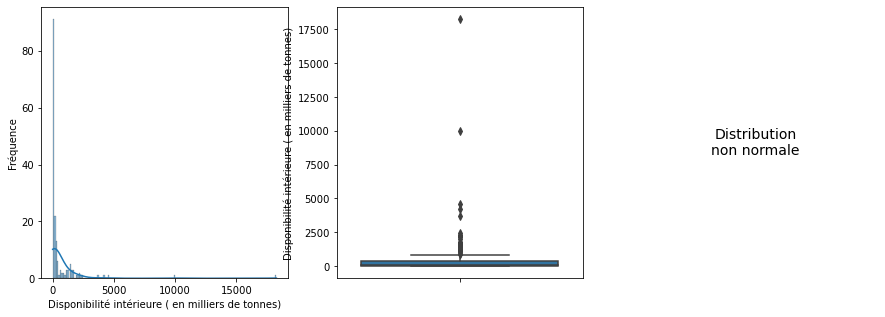

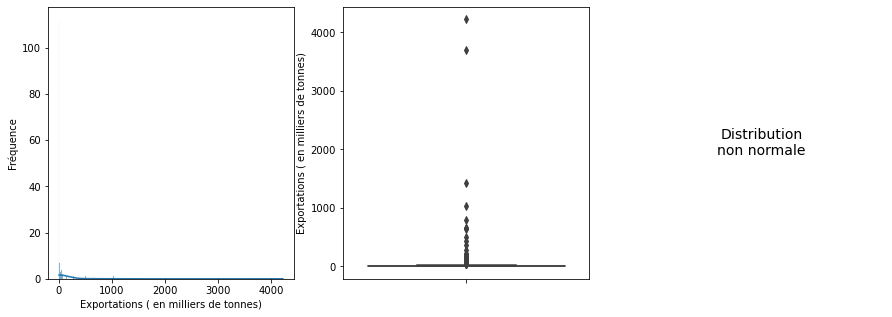

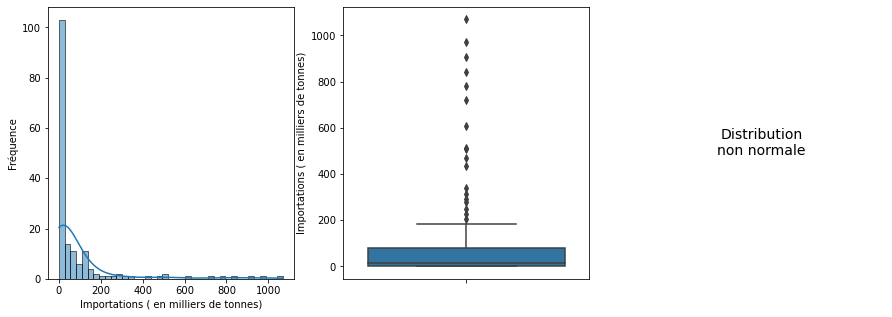

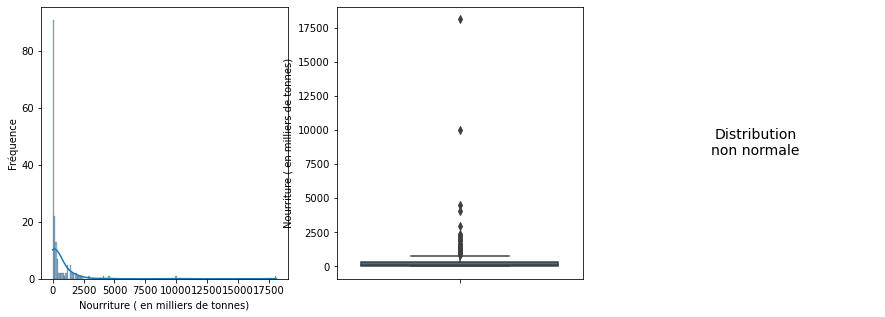

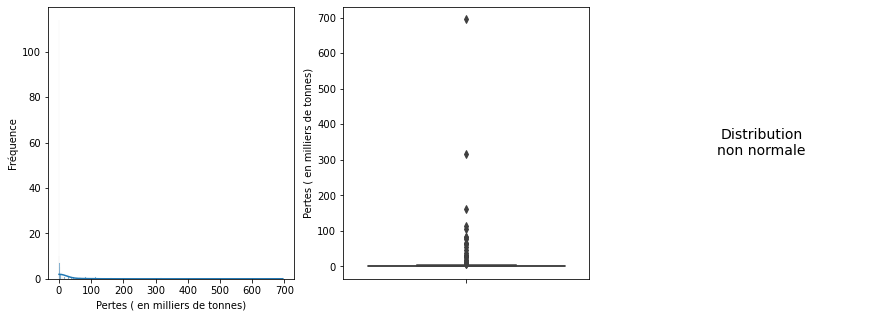

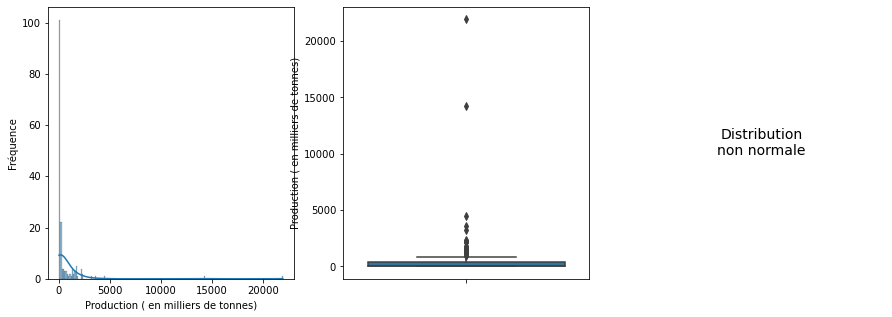

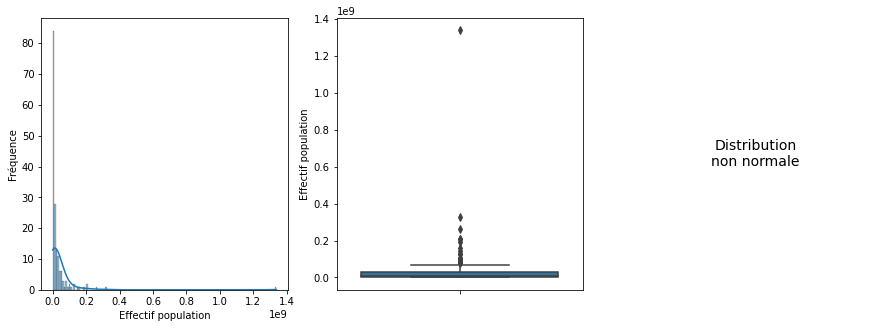

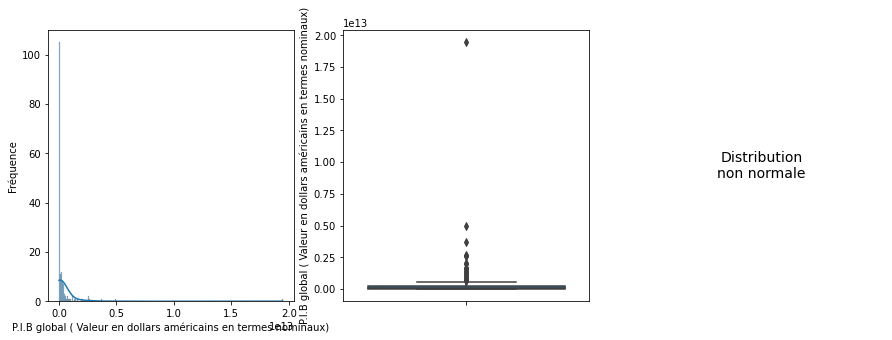

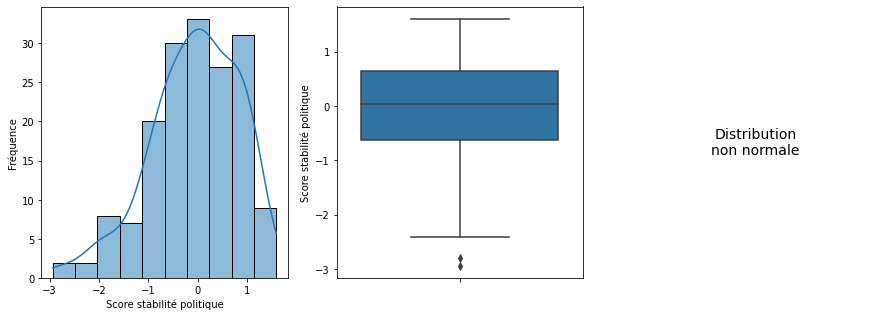

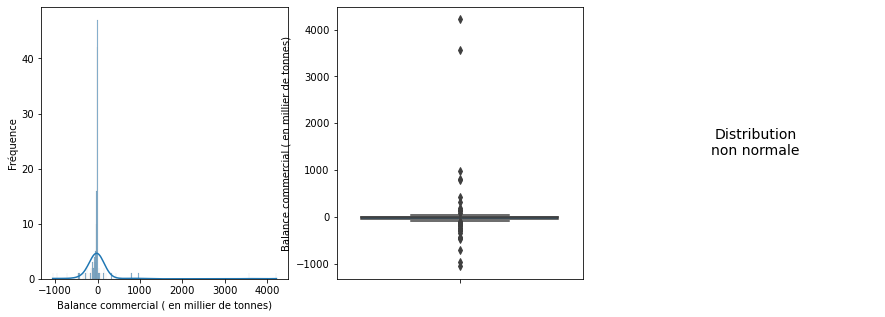

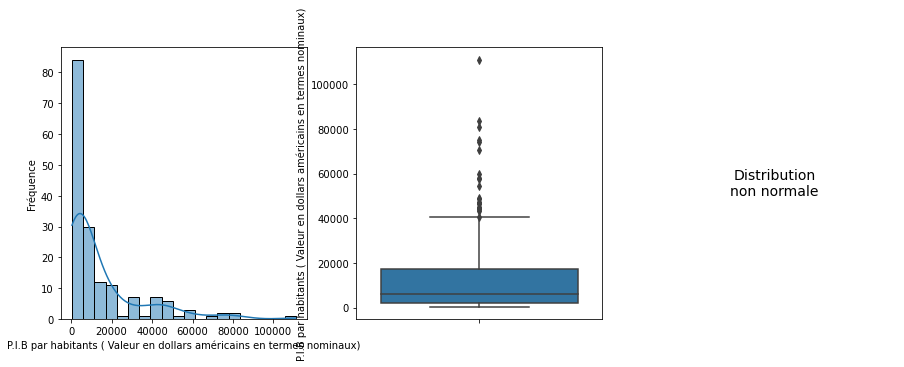

None

In [13]:
# fonction faisant une analyse descriptive de chaque variable
def descriptive_stats(df):
    # Calcul des statistiques descriptives pour chaque colonne
    stats = pd.concat([df.dtypes,
                       df.nunique(),
                       df.isnull().sum(),
                       df.mean(),
                       df.std(),
                       df.median(),
                       df.min(),
                       df.quantile(0.25),
                       df.quantile(0.75),
                       df.max(),
                       df.mode().T[0]], axis=1)
    stats.columns = ['Type', 'Valeurs uniques', 'Valeurs manquantes', 'Moyenne', 'Ecart-type', 'Médiane', 'Minimum', '1er quartile', '3ème quartile', 'Maximum', 'Mode']
    
    # Ajout du coefficient de variation
    stats['Coeff de variation'] = stats['Ecart-type'] / stats['Moyenne'] * 100
    
    # Ajout de la variance
    stats['Variance'] = np.square(stats['Ecart-type'])
    
    # Création d'un DataFrame pour stocker les statistiques descriptives
    output = pd.DataFrame(index=stats.index, columns=['Variable'] + stats.columns.tolist())
    
    # Ajout du nom de la variable dans la première colonne
    output['Variable'] = stats.index
    
    # Copie des statistiques descriptives dans le DataFrame de sortie
    output[stats.columns.tolist()] = stats.values
    
    # Réorganisation des colonnes du DataFrame de sortie
    output = output[['Variable'] + stats.columns.tolist()]
    
    # Réinitialisation de l'index du DataFrame de sortie
    output = output.reset_index(drop=True)
    
    return output

# Creation d'une fonction pour analyser les distributions de chaque variable.

def plot_variable_distributions(df):
    # Sélectionner les colonnes numériques
    numeric_columns = df.select_dtypes(include=['float', 'int']).columns

    # Générer des graphiques de distribution pour chaque colonne numérique
    for column in numeric_columns:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        sns.histplot(data=df, x=column, kde=True, ax=ax[0])
        ax[0].set_xlabel(column)
        ax[0].set_ylabel('Fréquence')
        sns.boxplot(data=df, y=column, ax=ax[1])
        ax[1].set_ylabel(column)
        
        # Vérifier si la distribution est normale
        _, pvalue = stats.normaltest(df[column].dropna())
        if pvalue < 0.05:
            ax[2].text(0.5, 0.5, "Distribution\nnon normale", ha='center', va='center', fontsize=14)
        else:
            ax[2].text(0.5, 0.5, "Distribution\nnormale", ha='center', va='center', fontsize=14)
        ax[2].set_xticks([])
        ax[2].set_yticks([])
        ax[2].set_frame_on(False)
        
        plt.show()

# Application de la fonction stat descriptive sur mon df
display(descriptive_stats(Etude_volaille_par_pays_2017))
# application de la fonction pour l'analyse des distributions
display(plot_variable_distributions(Etude_volaille_par_pays_2017))

In [14]:
#top et flop 20 pour chaque variable

# Définir les noms des colonnes contenant les indicateurs numériques
indicators = Etude_volaille_par_pays_2017.columns

# Créer des dictionnaires pour stocker les top 20 et flop 20 pour chaque indicateur
top_flop = {indicator: {"Top 20": [], "Flop 20": []} for indicator in indicators}

# Boucler sur chaque indicateur
for indicator in indicators:
    # Obtenir les 20 plus grandes valeurs pour l'indicateur actuel
    top = Etude_volaille_par_pays_2017.nlargest(20, indicator)[[indicator]]
    # Obtenir les 20 plus petites valeurs pour l'indicateur actuel
    flop = Etude_volaille_par_pays_2017.nsmallest(20, indicator)[[indicator]]
    # Ajouter les 20 valeurs de top et flop avec leur nom de pays correspondant
    top_flop[indicator]["Top 20"] = [(country, value) for country, value in top.itertuples()]
    top_flop[indicator]["Flop 20"] = [(country, value) for country, value in flop.itertuples()]

# Afficher les résultats
for indicator, data in top_flop.items():
    print(f"\033[1m{indicator}\033[0m") # mettre en gras le titre de la variable
    print("\033[4mTop 20\033[0m") # souligner le titre Top 20
    for i, (country, value) in enumerate(data["Top 20"]):
        print(f"{i+1}. {country}: {value:.2f}")
    print("\033[4mFlop 20\033[0m") # souligner le titre Flop 20
    for i, (country, value) in enumerate(data["Flop 20"]):
        print(f"{i+1}. {country}: {value:.2f}")
    print("")

Disponibilité intérieure ( en milliers de tonnes)
Top 20
1. États-Unis d'Amérique: 18266.00
2. Brésil: 9982.00
3. Fédération de Russie: 4556.00
4. Mexique: 4219.00
5. Inde: 3661.00
6. Japon: 2415.00
7. Indonésie: 2323.00
8. Royaume-Uni de Grande-Bretagne et d'Irlande du Nord: 2234.00
9. Iran (République islamique d'): 2220.00
10. Afrique du Sud: 2118.00
11. Argentine: 1962.00
12. Allemagne: 1739.00
13. Turquie: 1674.00
14. Myanmar: 1666.00
15. Colombie: 1643.00
16. Malaisie: 1621.00
17. France: 1573.00
18. Pérou: 1523.00
19. Philippines: 1521.00
20. Espagne: 1497.00
Flop 20
1. Kiribati: 2.00
2. Sao Tomé-et-Principe: 2.00
3. Djibouti: 3.00
4. Vanuatu: 3.00
5. Îles Salomon: 3.00
6. Dominique: 4.00
7. Guinée-Bissau: 4.00
8. Saint-Kitts-et-Nevis: 4.00
9. Timor-Leste: 5.00
10. Antigua-et-Barbuda: 7.00
11. Botswana: 7.00
12. Eswatini: 7.00
13. Tchad: 7.00
14. Gambie: 8.00
15. Grenade: 8.00
16. Saint-Vincent-et-les Grenadines: 8.00
17. Mongolie: 9.00
18. Cabo Verde: 10.00
19. Islande: 10.00
2

<div style='font-family:Garamond'><div style='font-size: 20px'>
À l'issue de cette analyse univariée, voici certains points que l'on peut retenir :<br/>
    
- Les États-Unis ainsi que le Brésil sont très au-dessus des autres pays en termes de disponibilité intérieure, d'exportations, de production, de nourriture, de production et de balance commerciale. Ce qui en fait des pays peu intéressants pour nous. Nous les supprimerons probablement de notre analyse.<br/>
<br/>
    
- Parmi les 20 pays ayant la balance commerciale la plus déficitaire, on retrouve : le Japon, le Mexique, l'Arabie Saoudite, l'Irak, l'Afrique du Sud, le Royaume-Uni, les Émirats arabes unis, Cuba, le Vietnam, l'Angola, les Philippines, Hong Kong, l'Allemagne, le Kazakhstan, Taïwan, le Ghana, le Koweït, la République de Corée, le Bénin et le Guatemala. Sauf frein éventuel (instabilité politique trop élevée, faible PIB par habitant), ces pays sont susceptibles de devenir les pays favoris pour notre exportation.<br/>
<br/>
- Parmi les pays les plus instables politiquement, on retrouve : le Yémen, l'Afghanistan, le Pakistan, l'Irak, la République centrafricaine, le Nigeria, le Soudan, le Mali, l'Ukraine, la Turquie, l'Éthiopie, le Liban, l'Égypte, le Tchad, le Niger, le Venezuela (République bolivarienne du), le Bangladesh, les Philippines, le Kenya et le Cameroun. Ces pays risquent d'être trop instables pour entamer une exportation chez eux et donc ne risquent pas d'être intéressants pour nous.

## <span style='font-family:Garamond'>2. Analyse bivariée</span> <a class="anchor" id="section_2_2"></a>

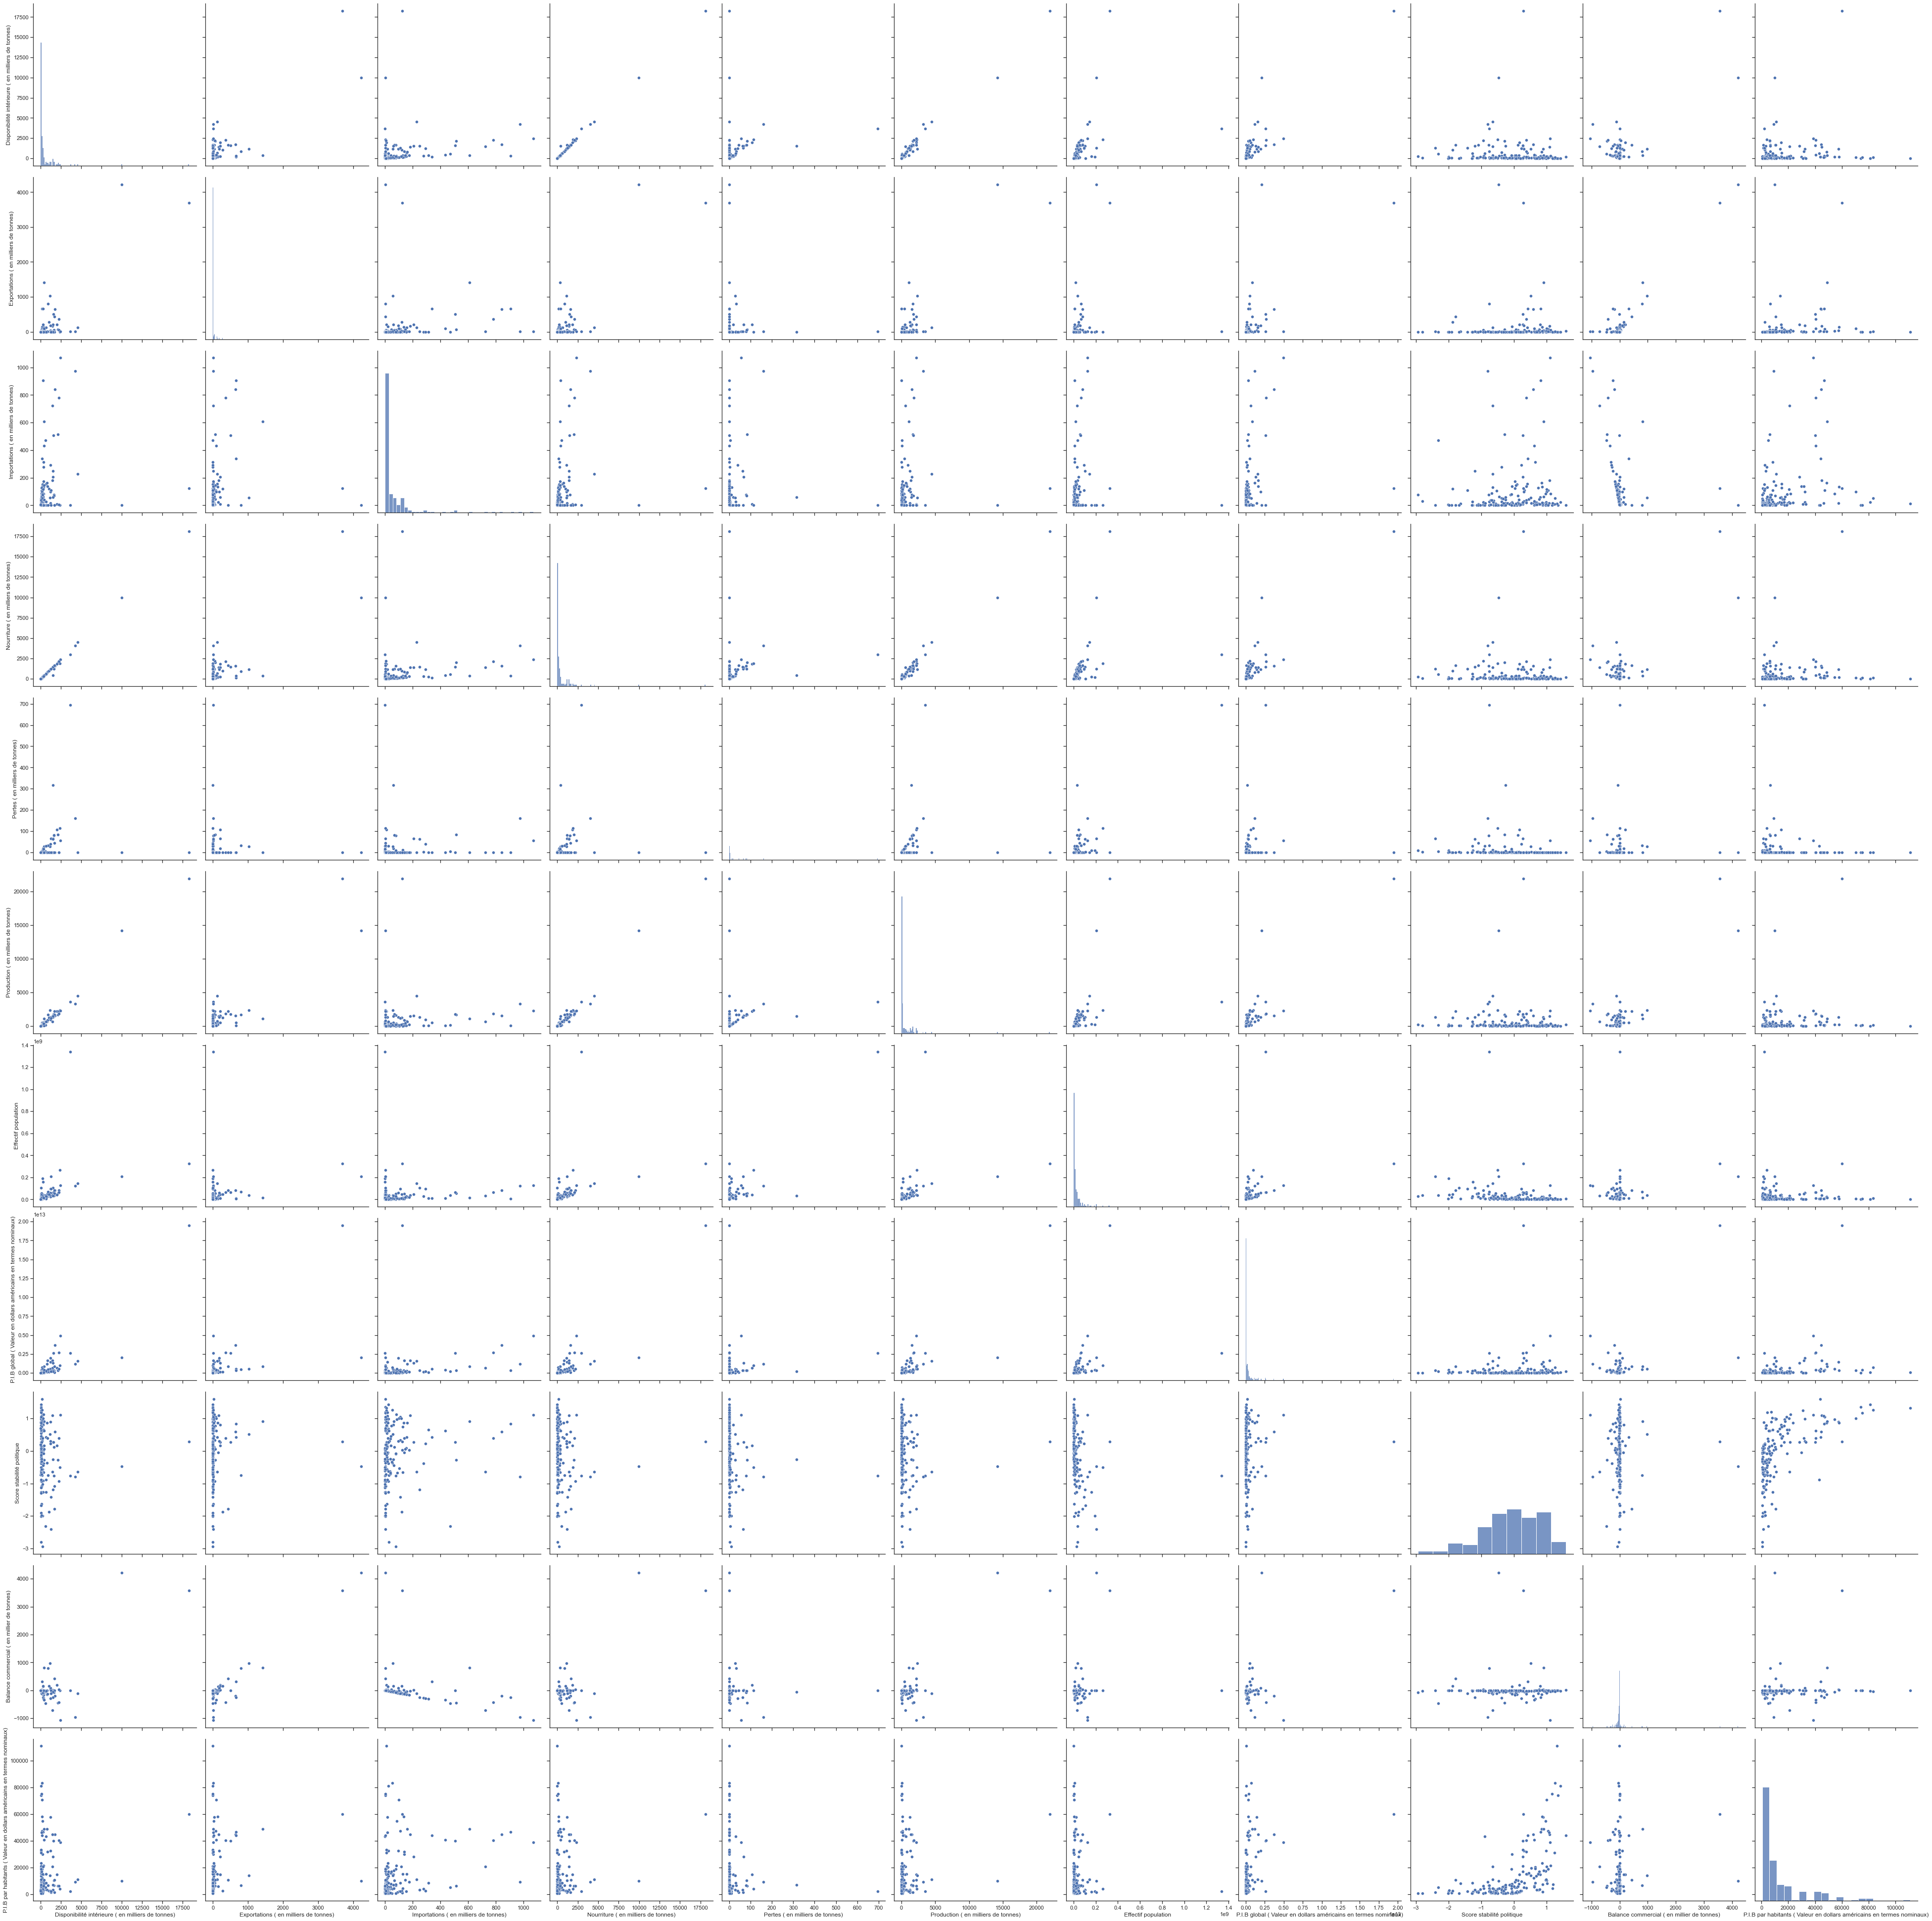

In [15]:
# Création de pairs plots.
sns.set(style="ticks")
sns.pairplot(Etude_volaille_par_pays_2017, height=5)
plt.show()

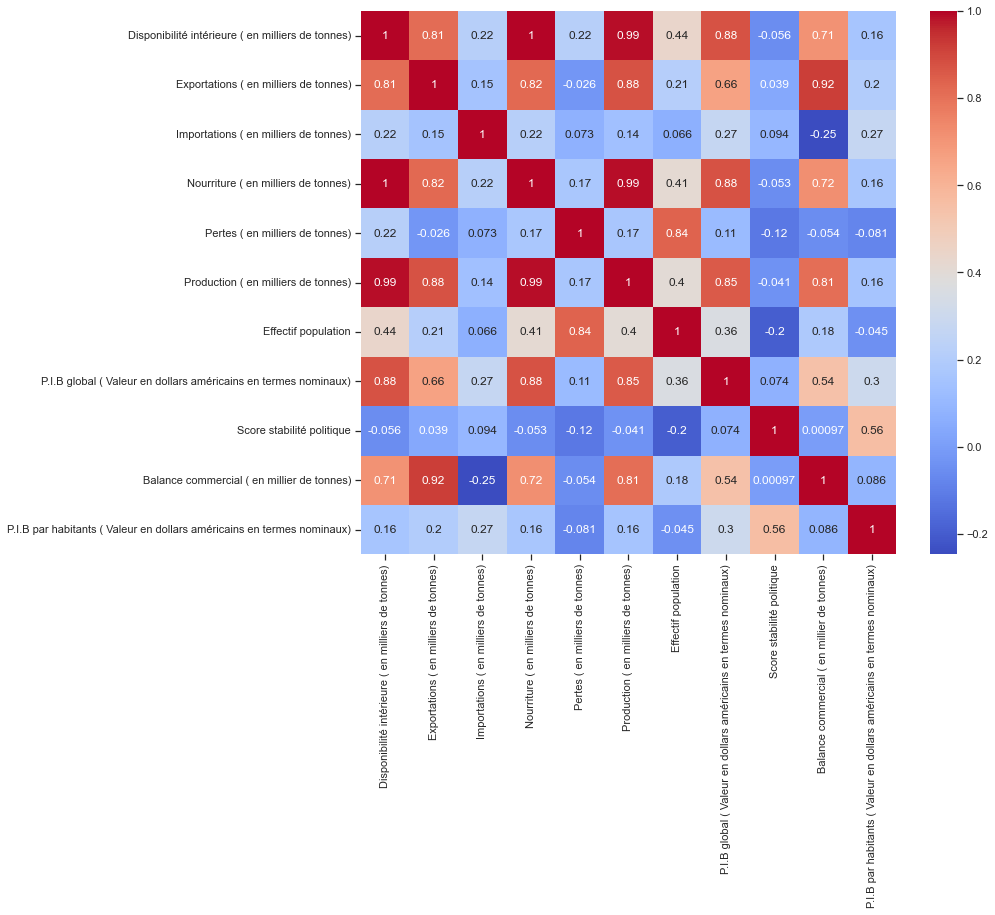

In [16]:
# Matrice des correlations.

# Calculer la matrice de corrélation
corr_matrix = Etude_volaille_par_pays_2017.corr()
# Définir la taille de l'affichage
fig, ax = plt.subplots(figsize=(12, 10))
# Créer la heatmap de la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
# Afficher la figure
plt.show()

<div style='font-family:Garamond'><div style='font-size: 20px'>
Grâce à la heatmap, on peut voir que plusieurs variables sont très corrélées entre elles, ce qui permet de se débarrasser de certaines sans fausser l'analyse.
<br/>    
    
Je décide de garder seulement 5 indicateurs :

- Importation : Plus c'est haut, plus c'est un pays intéressant.<br/>
<br/>    
- Pertes (représentant aussi l'effectif, les deux variables sont corrélées) : Plus c'est bas, plus ça risque d'être un paysintéressant (pas de difficulté pour stocker sur place).<br/>
<br/>    
- Balance commerciale : Plus elle est déficitaire, plus le pays risque d'avoir besoin de poulet.<br/>
<br/>    
- PIB par habitant : Plus il est élevé, plus les habitants seront en mesure d'acheter de la viande de volaille.<br/>
<br/>    
- Score de stabilité politique : Plus il est élevé, plus c'est intéressant.<br/>

In [17]:
# suprimmer les variables exportation, nourriture, production,pib global,effectif population.
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.drop(columns=['Exportations ( en milliers de tonnes)','Production ( en milliers de tonnes)', 'Nourriture ( en milliers de tonnes)', 'Disponibilité intérieure ( en milliers de tonnes)', 'P.I.B global ( Valeur en dollars américains en termes nominaux)', 'Effectif population'])

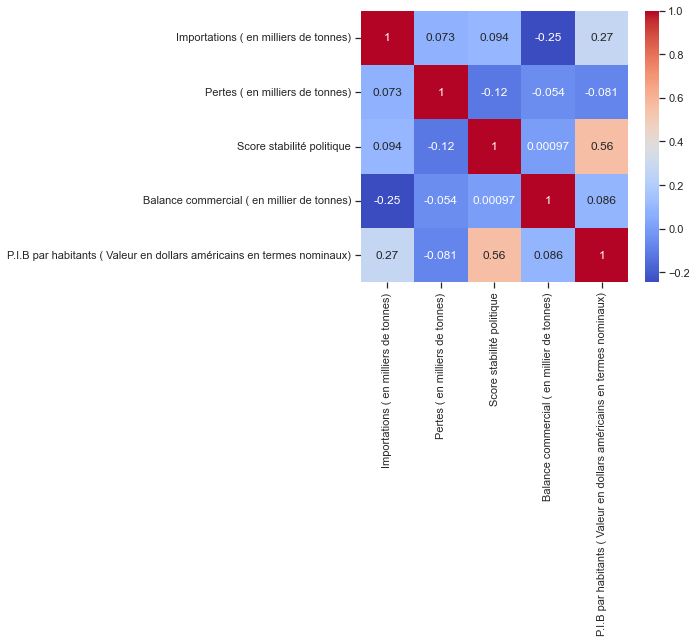

In [18]:
# Refaire une matrice des correlations afin de voir si toutes les variables sont bien décorélés.

# Calculer la matrice de corrélation
corr_matrix = Etude_volaille_par_pays_2017.corr()
# Définir la taille de l'affichage
fig, ax = plt.subplots(figsize=(6, 5))
# Créer la heatmap de la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
# Afficher la figure
plt.show()

***

#  <span style='font-family:Garamond'><span style='color:#B21807'>3. Analyse en composante principale (A.C.P)</span> <a class="anchor" id="chapter3"></a>

<div style='font-family:Garamond'><div style='font-size: 20px'>
Le but de cette analyse en composante principale est d'obtenir une première visualisation des pays par similarité en réduisant la dimensionnalité des données et en les projetant sur le graphique des individus.

Cela nous permettra d'avoir une première analyse visuelle.

Nous allons utiliser 3 graphiques :

- L'éboulis des valeurs propres : afin de connaître le pourcentage de variance retenu pour chaque nombre de composantes principales retenues.
    
- Le cercle des corrélations : afin de comprendre quelles sont les caractéristiques liées à chaque axe du graphique des individus.
    
- Le graphique des individus : afin d'obtenir une première projection des pays selon leurs caractéristiques.

## <span style='font-family:Garamond'>1. Execution de l'A.C.P</span> <a class="anchor" id="section_3_1"></a>

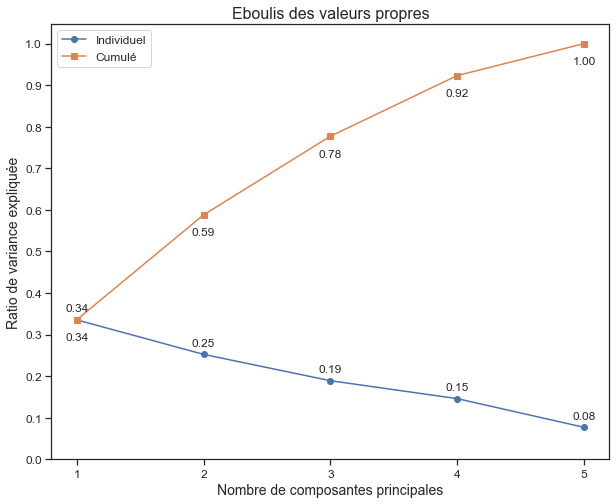

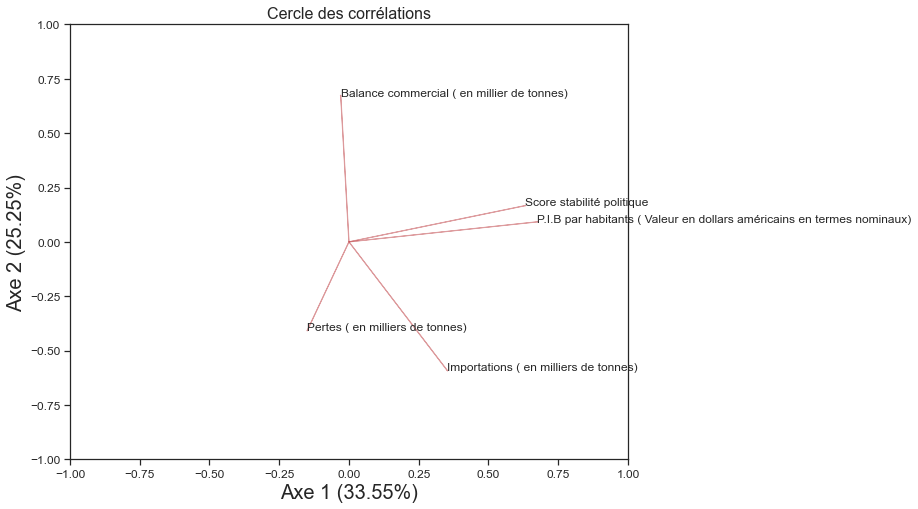

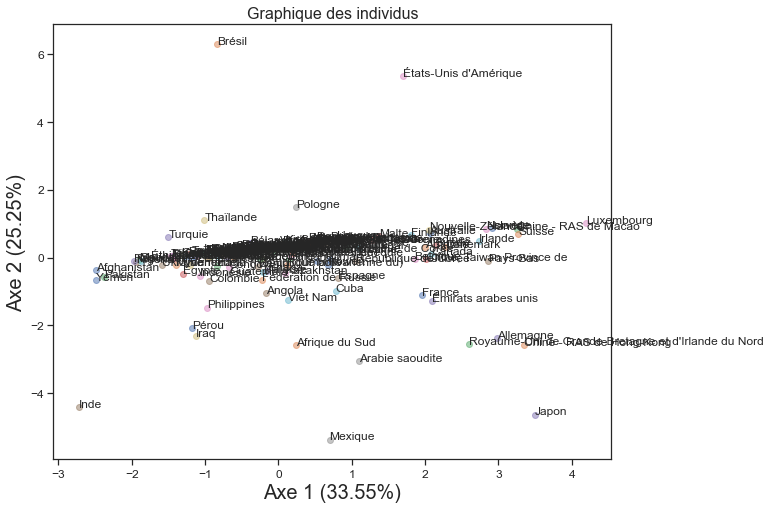

In [19]:
# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(Etude_volaille_par_pays_2017)

# Analyse en composantes principales
pca = PCA()
pca.fit(X)

# Eboulis des valeurs propres
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, '-o', label='Individuel')
ax.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulé')
ax.set_xlabel('Nombre de composantes principales', fontsize=14)
ax.set_ylabel('Ratio de variance expliquée', fontsize=14)
ax.set_title('Eboulis des valeurs propres', fontsize=16)
ax.set_xticks(np.arange(1, len(pca.explained_variance_ratio_)+1, 1))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(pca.explained_variance_ratio_):
    ax.text(i+1, v+0.02, f'{v:.2f}', fontsize=12, ha='center')
for i, v in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    ax.text(i+1, v-0.05, f'{v:.2f}', fontsize=12, ha='center')
ax.legend(loc='upper left', fontsize=12)

# Cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
for i, var in enumerate(Etude_volaille_par_pays_2017.columns):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    ax.annotate(var, (pca.components_[0, i], pca.components_[1, i]), fontsize=12)
ax.set_xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=20)
ax.set_ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=20)
ax.set_title('Cercle des corrélations', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

# Graphique des individus
fig, ax = plt.subplots(figsize=(10, 8))
for x, pays in zip(pca.transform(X), Etude_volaille_par_pays_2017.index):
    ax.scatter(x[0], x[1], alpha=0.5)
    ax.annotate(pays, (x[0], x[1]))
ax.set_xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=20)
ax.set_ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=20)
ax.set_title('Graphique des individus', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [20]:
# Voir indicateurs pour le Brésil, l'Inde ainsi que les Etats-Unis.
B_i_USA = Etude_volaille_par_pays_2017.loc[['Brésil', 'Inde', 'États-Unis d\'Amérique', 'Japon', 'Mexique']]
B_i_USA_markdown_table = B_i_USA.to_markdown()
B_i_USA

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux)
Zone,,,,,
Brésil,3.00,0.00,-0.47,4220.00,9928.68
Inde,0.00,695.00,-0.76,4.00,1960.39
États-Unis d'Amérique,123.00,0.00,0.29,3569.00,59921.67
Japon,1069.00,56.00,1.11,-1059.00,38672.41
Mexique,972.00,161.00,-0.80,-963.00,9287.84


<div style='font-family:Garamond'><div style='font-size: 20px'>

    
**Analyse ACP : résultats et observations**

Tout d'abord, il est important de garder à l'esprit que les graphiques obtenus avec seulement deux dimensions ne représentent qu'une partie des informations contenues dans les données initiales (59% de la variance). Par conséquent, l'interprétation de ces graphiques doit être considérée comme une première étape dans l'analyse des données, qui doit être approfondie avec d'autres méthodes d'analyse. Les méthodes de clustering contenues dans le deuxième notebook permettront de réaliser cette démarche.

**Signification de chaque axe :**

Grâce au cercle des corrélations, on comprend que :

L'axe des abscisses de notre graphique des individus correspond au score de stabilité politique ainsi qu'au PIB par habitant. Plus les individus sont à droite, plus ces deux variables sont élevées.

L'axe des ordonnées décrit la balance commerciale, les importations ainsi que les pertes (de manière moins significative pour ce dernier) : plus l'on monte en ordonnées, plus la balance commerciale est positive, donc les importations sont négatives avec également moins de pertes.

**Outliers :**

Tout d'abord, on peut voir que les États-Unis et le Brésil ressortent comme très différents du reste des pays sur le graphique des individus.

En observant le cercle des corrélations, le graphique des individus ainsi que les caractéristiques de ces pays mentionnées ci-dessus, on peut comprendre que le Brésil et les États-Unis se distinguent par leur balance commerciale fortement positive, ce qui signifie que par corrélation, ces deux pays ont une forte production de viande de volaille. Cela les exclut des pays potentiellement candidats pour notre exportation de viande de volaille. On peut donc les supprimer.

Nous avons également l'Inde qui se détache du reste, mais en raison de ses pertes importantes. Cependant, en regardant ci-dessus ses caractéristiques, on peut voir que l'Inde reste malgré tout autonome et n'importe pas de viande de volaille, ce qui la disqualifie également. On peut donc la supprimer.

**Eboulis des valeurs propres :**

On peut voir qu'il est nécessaire d'utiliser au moins 4 composantes principales pour expliquer au moins 90% de la variance. C'est ce nombre de composantes que nous garderons pour effectuer nos clusters.

**Observations :**

En comprenant le graphique des individus, on peut dire que les pays qui vont le plus nous intéresser seront idéalement dans le bas à droite sur le graphique des individus, c'est-à-dire des pays ayant une balance commerciale déficitaire (pays non autonomes en production de viande de volaille avec un besoin d'en importer) et avec une stabilité politique permettant un PIB par habitant suffisant pour commercer notre viande de volaille.

Les deux outliers nous empêchent de zoomer sur le reste des pays. Il serait intéressant de supprimer nos deux outliers (Brésil et États-Unis) et de reprojeter les pays sur notre graphique des individus. C'est ce que nous allons faire.

In [21]:
# Supression des outliers : 

# créer un nouveau dataframe vide pour outliers
outliers = pd.DataFrame(columns=Etude_volaille_par_pays_2017.columns)

# sélectionner  le brésil, Inde et les Etats unis par leur nom d'index
indiv_a_deplacer = Etude_volaille_par_pays_2017.loc[['Brésil', 'Inde', "États-Unis d'Amérique"]]

# supprimer les individus du dataframe d'origine
Etude_volaille_par_pays_2017.drop(indiv_a_deplacer.index, inplace=True)

# ajouter les individus au nouveau dataframe
outliers = outliers.append(indiv_a_deplacer)

C:\Users\DATA\AppData\Local\Temp\ipykernel_19880\1224239124.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(indiv_a_deplacer)


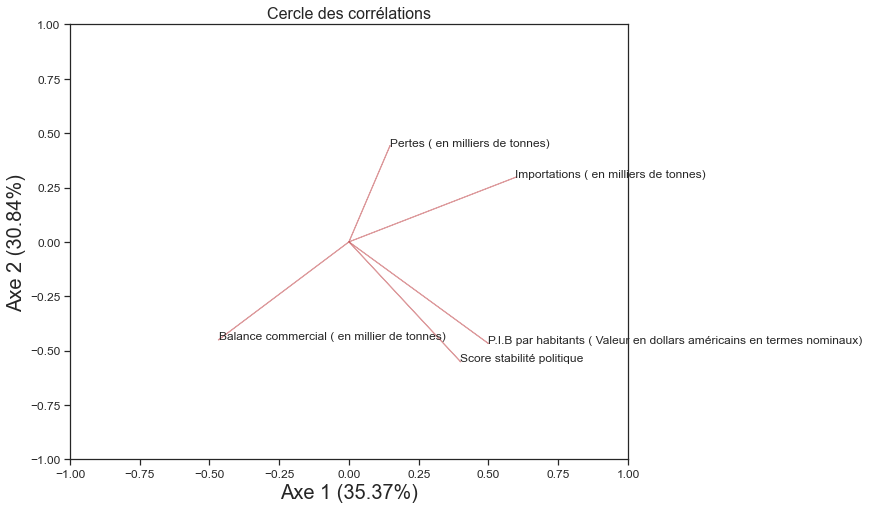

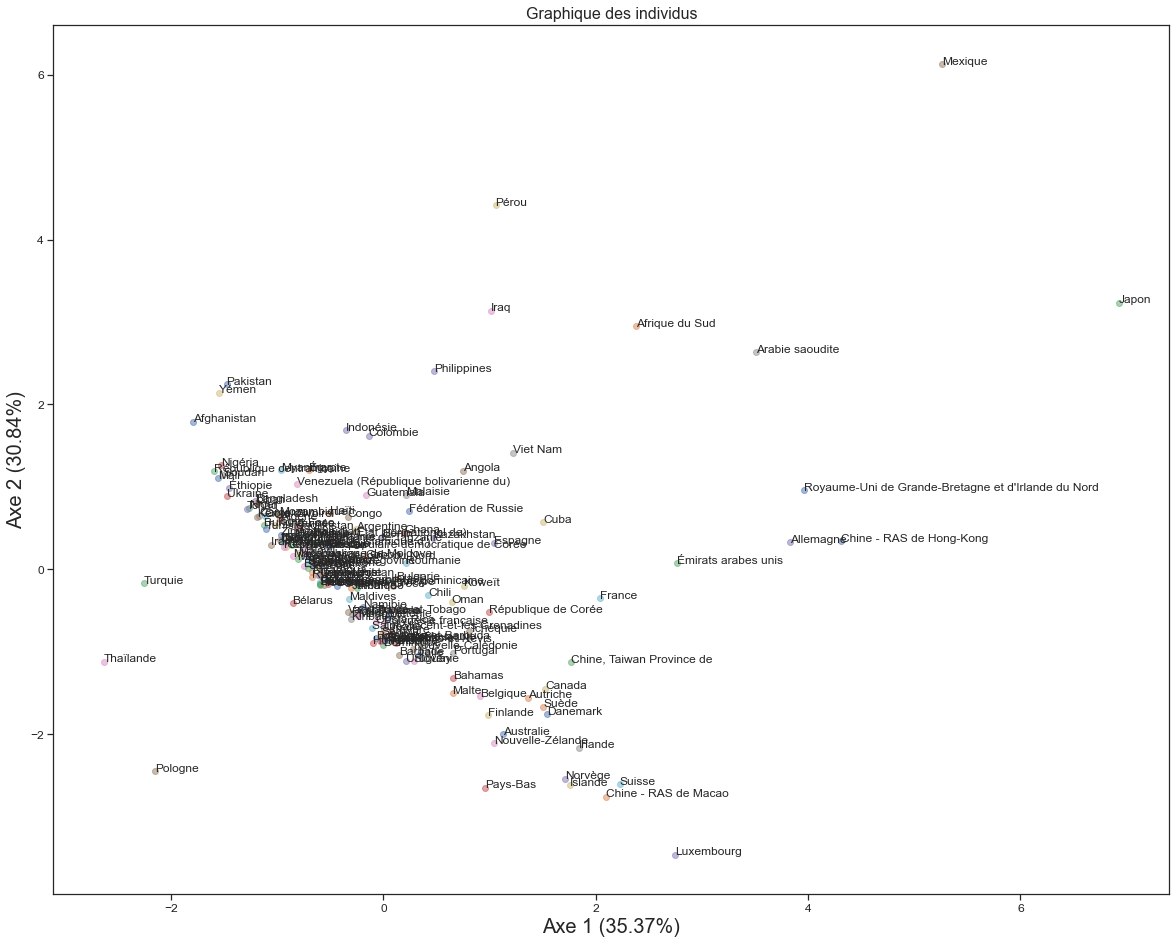

In [22]:
# Seconde ACP 

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(Etude_volaille_par_pays_2017)

# Analyse en composantes principales
pca = PCA()
pca.fit(X)

# Cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
for i, var in enumerate(Etude_volaille_par_pays_2017.columns):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    ax.annotate(var, (pca.components_[0, i], pca.components_[1, i]), fontsize=12)
ax.set_xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=20)
ax.set_ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=20)
ax.set_title('Cercle des corrélations', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

# Graphique des individus
fig, ax = plt.subplots(figsize=(20, 16))
for x, pays in zip(pca.transform(X), Etude_volaille_par_pays_2017.index):
    ax.scatter(x[0], x[1], alpha=0.5)
    ax.annotate(pays, (x[0], x[1]))
ax.set_xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=20)
ax.set_ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=20)
ax.set_title('Graphique des individus', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)


plt.show()

<div style='font-family:Garamond'><div style='font-size: 20px'>

Grâce à cette nouvelle projection des données, on observe :

- Certains pays potentiellement candidats pour notre exportation : Mexique, Japon, Arabie Saoudite, Royaume-Uni, Hong Kong, Luxembourg, Allemagne, Émirats Arabes Unis.

- Certains pays ne seront pas candidats, tels que la Thaïlande, la Turquie et la Pologne.

- Pour les autres pays situés au centre, il est nécessaire d'utiliser des méthodes de clustering plus avancées, ce que nous allons faire dans le second notebook.

***

#  <span style='font-family:Garamond'><span style='color:#B21807'>4. Conclusion</span> <a class="anchor" id="chapter4"></a>

In [23]:
Etude_volaille_par_pays_2017.head(10)

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux)
Zone,,,,,
Afghanistan,29.00,2.00,-2.80,-29.00,520.62
Afrique du Sud,514.00,83.00,-0.28,-451.00,6121.88
Albanie,38.00,0.00,0.38,-38.00,4514.20
Algérie,2.00,13.00,-0.92,-2.00,4109.70
Allemagne,842.00,0.00,0.59,-196.00,44651.83
Angola,277.00,2.00,-0.38,-277.00,4095.81
Antigua-et-Barbuda,7.00,0.00,0.75,-7.00,15383.42
Arabie saoudite,722.00,0.00,-0.64,-712.00,20802.46
Argentine,8.00,106.00,0.17,199.00,14648.85


In [24]:
# exporter la table finale pour le second notebook sur les clustering.
Etude_volaille_par_pays_2017.to_csv('Etude_volaille_par_pays_2017.csv', index=True)

<div style='font-family:Garamond'><div style='font-size: 20px'>

Nous allons passer maintenant aux méthodes de clustering sur un second notebook.(Amblard_Thomas_2_clustering_visualisations_032022)
